## Download and prepare the dataset

In [1]:
import tensorflow.python.keras as k
k.backend.set_floatx("posit160")
k.backend.floatx()

2023-07-11 10:57:53.499588: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/count
2023-07-11 10:57:53.499675: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/count
2023-07-11 10:57:53.499693: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/api
2023-07-11 10:57:53.499703: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/api


'posit160'

In [2]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [3]:
train_labels.shape

(60000, 10)

## Download and prepare the dataset

In [4]:
from tensorflow import random
random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="posit160")

In [5]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

# kernel_initializer=random_normal_init
inputs = k.Input(shape=(28, 28, 1))
x = k.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh',kernel_initializer=random_normal_init, padding='same')(inputs) #C1
x = k.layers.MaxPooling2D()(x) #S2
x = k.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', kernel_initializer=random_normal_init,padding='valid')(x) #C3
x = k.layers.MaxPooling2D()(x) #S4
x = k.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh',kernel_initializer=random_normal_init, padding='valid')(x) #C5
x = k.layers.Flatten()(x) #Flatten    
x = k.layers.Dense(84, activation='tanh',kernel_initializer=random_normal_init)(x) #F6
outputs = k.layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init)(x) #Output layer

model = k.Model(inputs, outputs)

2023-07-11 10:57:56.344465: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(optimizer='adam',
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.1, shuffle=False)

2023-07-11 10:57:56.966777: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 84672000 exceeds 10% of free system memory.
2023-07-11 10:57:57.059528: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:164] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
422/422 [==============================] - 347s 821ms/step - loss: 2.4316 - accuracy: 0.2173 - val_loss: 2.7412 - val_accuracy: 0.3700
Epoch 2/30
422/422 [==============================] - 348s 824ms/step - loss: 1.2158 - accuracy: 0.3052 - val_loss: 1.5464 - val_accuracy: 0.4633
Epoch 3/30
422/422 [==============================] - 365s 866ms/step - loss: 1.1445 - accuracy: 0.4584 - val_loss: 1.0903 - val_accuracy: 0.6191
Epoch 4/30
422/422 [==============================] - 381s 903ms/step - loss: 0.6792 - accuracy: 0.5271 - val_loss: 0.7786 - val_accuracy: 0.7332
Epoch 5/30
422/422 [==============================] - 395s 937ms/step - loss: 0.5972 - accuracy: 0.5723 - val_loss: 0.5586 - val_accuracy: 0.8079
Epoch 6/30
422/422 [==============================] - 395s 934ms/step - loss: 0.4240 - accuracy: 0.6021 - val_loss: 0.4066 - val_accuracy: 0.8506
Epoch 7/30
422/422 [==============================] - 386s 916ms/step - loss: 0.3182 - accuracy: 0.6079 - val_loss: 0.3329 -

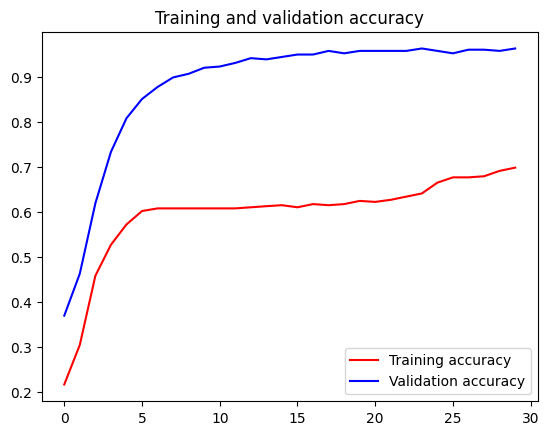

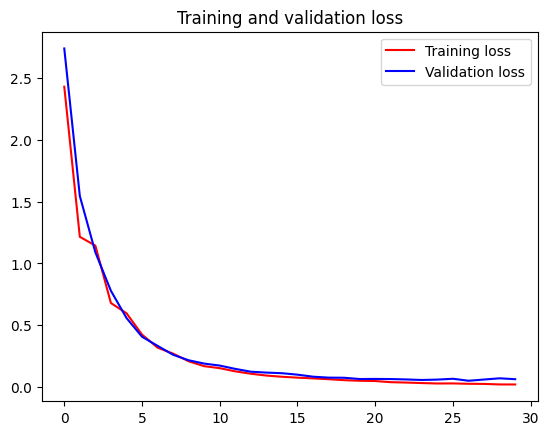

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 33s 107ms/step - loss: 0.0607 - accuracy: 0.8684
